In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from scipy.signal import detrend

def get_FAMIs(x0,y0):
    """ 

    Parameters
    ----------
    x0: static variables of interest 
    
    Returns
    -------
    FAMIs: the residual of the multiple linear regression 
    coef: coefficients of the variables of interest from regression line
    """
    x = np.log(x0)

    y = np.log(y0)
    V = x.shape[1]

    X = sm.add_constant(x)
    # print(X.shape,y.shape)
    model = sm.OLS(y, X).fit(cov_type='HC1')
    coef = model.params[1:].tolist()
    CI_low = model.conf_int(alpha=0.05, cols=None)[1:][0].tolist()
    CI_high = model.conf_int(alpha=0.05, cols=None)[1:][1].tolist()

    y_pred = model.params[0]  + np.sum([model.params[v+1]*np.log(x0)[:,v] for v in range(V)], axis=0)
    FAMIs = y-y_pred

    return FAMIs, coef, CI_low, CI_high



def adf_detrend(data):
    # ADF Test on each column
    N, T = data.shape
    ts = np.zeros((N,T),dtype=float)
    for n in range(N):
        result = adfuller(data[n])
        if result[1]>0.05:
            ts_detrended = detrend(data[n])
        # result_detrended = adfuller(ts_detrended)
        
        else: ts_detrended = data[n]
        ts[n] = ts_detrended.reshape(1,T)
    return ts

def symbolize(values, percentiles):
        # Flatten the array to create a 1D array for binning
        flat_values = values.flatten()
        binned_indices = np.digitize(flat_values, percentiles, right=True)
        symbolized_array = binned_indices.reshape(values.shape)
        # print(np.unique(symbolized_array))
        return symbolized_array


In [2]:
yearly_carbon_data = pd.read_csv('./Data/yearly_carbon.csv')
yearly_carbon_data

,Unnamed: 0,countyfips,year,kgco2,tavg,Shape_Area,vehicles used in commuting,Total Population,Unemployment,Smoking,...,pm2.5,State,County,VEG_FARMS07,VEG_FARMS12,GHVEG_FARMS07,GHVEG_FARMS12,PerCapita_CO2,PerCapita_TEMP,tavg_adj
0,0,1001,1981,1.926077e+08,17.438750,1.568052e+09,22300,55246.0,1449.0,409.0,...,12.92,AL,Autauga,34.0,45.0,0.0,0.0,3486.364384,0.000316,290.588750
1,1,1001,1982,1.871494e+08,18.362583,1.568052e+09,22300,55246.0,1449.0,409.0,...,12.92,AL,Autauga,34.0,45.0,0.0,0.0,3387.564956,0.000332,291.512583
2,2,1001,1983,1.915844e+08,16.922833,1.568052e+09,22300,55246.0,1449.0,409.0,...,12.92,AL,Autauga,34.0,45.0,0.0,0.0,3467.842824,0.000306,290.072833
3,3,1001,1984,1.991576e+08,17.827917,1.568052e+09,22300,55246.0,1449.0,409.0,...,12.92,AL,Autauga,34.0,45.0,0.0,0.0,3604.923055,0.000323,290.977917
4,4,1001,1985,2.052076e+08,17.947333,1.568052e+09,22300,55246.0,1449.0,409.0,...,12.92,AL,Autauga,34.0,45.0,0.0,0.0,3714.432972,0.000325,291.097333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113622,113622,56045,2013,5.356496e+07,6.993333,6.191772e+09,2765,7158.0,142.0,775.0,...,10.71,WY,Weston,0.0,0.0,0.0,0.0,7483.230282,0.000977,280.143333
113623,113623,56045,2014,4.882934e+07,6.718500,6.191772e+09,2765,7158.0,142.0,775.0,...,10.71,WY,Weston,0.0,0.0,0.0,0.0,6821.645089,0.000939,279.868500
113624,113624,56045,2015,4.620565e+07,8.287333,6.191772e+09,2765,7158.0,142.0,775.0,...,10.71,WY,Weston,0.0,0.0,0.0,0.0,6455.106280,0.001158,281.437333
113625,113625,56045,2016,4.459598e+07,8.615750,6.191772e+09,2765,7158.0,142.0,775.0,...,10.71,WY,Weston,0.0,0.0,0.0,0.0,6230.228481,0.001204,281.765750


# Scaling exponents $\beta_{N,t}$ and $\beta_{R,t}$ in multivariate urban scaling

['Total Population', 'Shape_Area', 'Unemployment']
3071 21
1995 (3,)
1996 (3,)
1997 (3,)
1998 (3,)
1999 (3,)
2000 (3,)
2001 (3,)
2002 (3,)
2003 (3,)
2004 (3,)
2005 (3,)
2006 (3,)
2007 (3,)
2008 (3,)
2009 (3,)
2010 (3,)
2011 (3,)
2012 (3,)
2013 (3,)
2014 (3,)
2015 (3,)


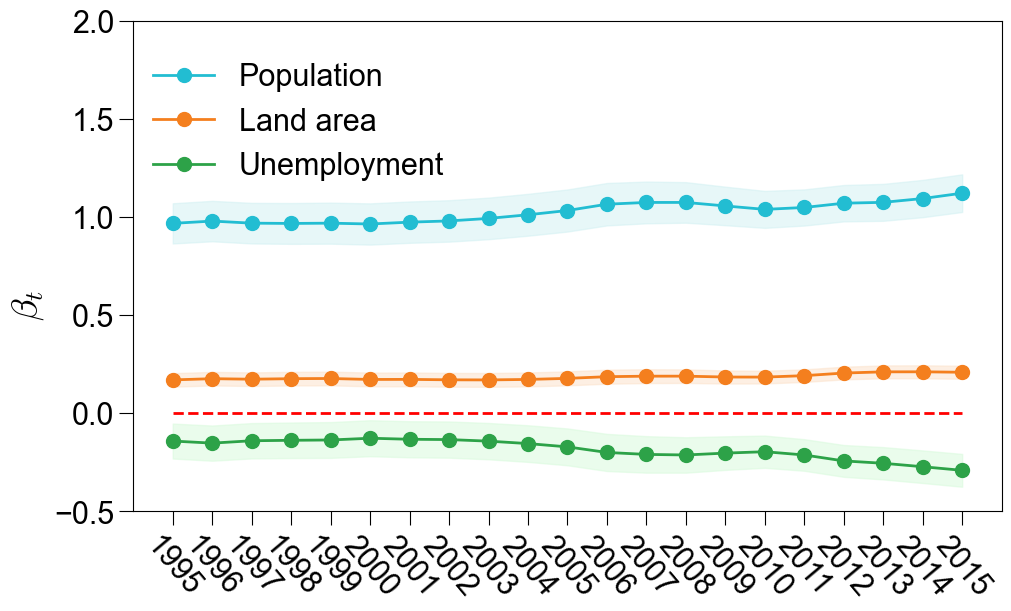

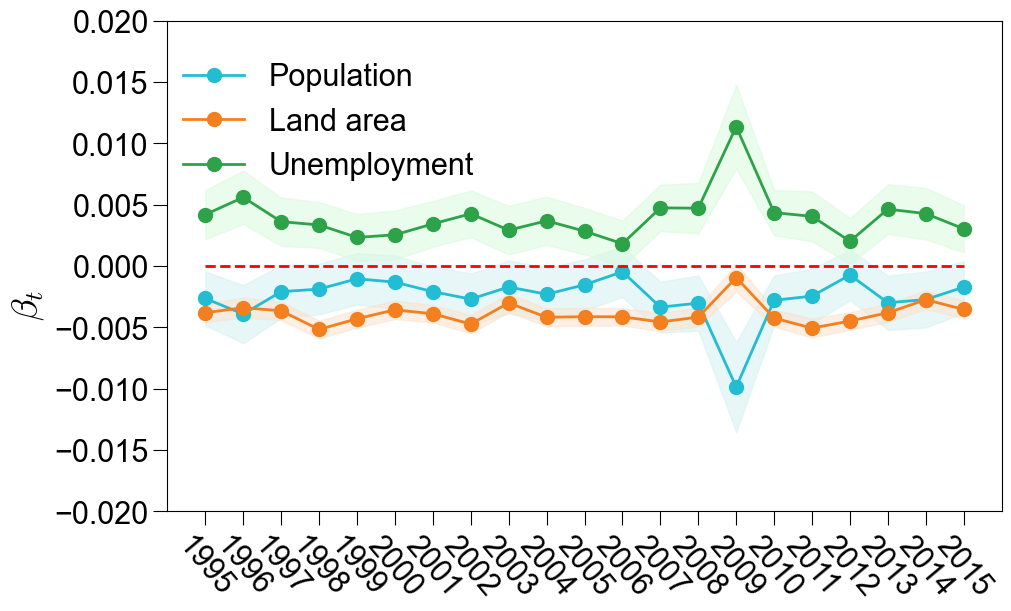

In [5]:

index = ['Total Population',
         'Shape_Area',
         'Unemployment'
         ]

print(index)
# dataset = CO2_TEMP_county
dataset = yearly_carbon_data[yearly_carbon_data['year'].isin(range(1995,2016))]
M = len(dataset.countyfips.unique()); 

static_variables = np.ones((M, len(index)), dtype=float)
for i in range(len(index)):
    static_variables[:,i] = dataset[(dataset['year']==2010)][index[i]].tolist()
T = len(dataset.year.unique());print(M, T)
FAMIs_CO2 = np.zeros((M, T), dtype=float)
FAMIs_CO2_static = np.zeros((len(index), T), dtype=float)
FAMIs_CO2_CI_low = np.zeros((len(index), T), dtype=float)
FAMIs_CO2_CI_high = np.zeros((len(index), T), dtype=float)
FAMIs_TEMP = np.zeros((M, T), dtype=float)
FAMIs_TEMP_static = np.zeros((len(index), T), dtype=float)
FAMIs_TEMP_CI_low = np.zeros((len(index), T), dtype=float)
FAMIs_TEMP_CI_high = np.zeros((len(index), T), dtype=float)

PerCapita_CO2 = np.zeros((M,T), dtype=float)
PerCapita_TEMP = np.zeros((M,T), dtype=float)

for t in range(T):
    y = dataset.year.unique()[t]
    print(y, FAMIs_TEMP_CI_low[:,t].shape)
    df = dataset[(dataset['year']==y)]
    FAMIs_CO2[:,t], FAMIs_CO2_static[:,t], FAMIs_CO2_CI_low[:,t], FAMIs_CO2_CI_high[:,t] = get_FAMIs(static_variables,df['kgco2'])
    
    FAMIs_TEMP[:,t], FAMIs_TEMP_static[:,t], FAMIs_TEMP_CI_low[:,t], FAMIs_TEMP_CI_high[:,t] = get_FAMIs(static_variables,df['tavg_adj'])
    
    PerCapita_CO2[:,t] = df['PerCapita_CO2']
    PerCapita_TEMP[:,t] = df['PerCapita_TEMP']

colors = ['#22BDD2', '#F47F1E', '#2DA248','#9368AB',]
shadows = ['#D0F0F2', '#FCE1C9', '#D7FADB','#E4D8F2',]
indices = ['Population','Land area',
        #    'vehicles used in commuting',
           'Unemployment',
           ]
plt.rcParams.update({
    'font.size' : 22,
    "lines.linewidth": 2,
    "lines.markersize": 10,
    "font.family":"arial",
    #"font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "mathtext.default": "it",
    "mathtext.rm"  : "arial",
        })
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6), sharex=True, constrained_layout=True)
axes.tick_params(axis="x",direction="out", size=10)
axes.tick_params(axis="y",direction="out", size=10)


for i in range(len(index)):
    axes.plot(range(T),FAMIs_CO2_static[i,:],'o-',label=indices[i], color=colors[i],)
    axes.fill_between(range(T), FAMIs_CO2_CI_low[i,:], FAMIs_CO2_CI_high[i,:], color=shadows[i],alpha=.5)
axes.hlines(y=0,xmin=0,xmax=T-1,linestyles='--',colors='r')
axes.set_xticks(range(0,T,1),[dataset.year.unique()[t] for t in range(0,T,1)],rotation=-50, size=22)
axes.set_ylim([-.5, 2])
fig.supylabel(r'$\beta_t$')
fig.legend( loc = 'upper left', bbox_to_anchor = (0.12, -0.05, 1, 1), frameon=False)
# plt.savefig('ScalingExponent_FAMI_CO2.pdf',dpi=300)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 6),  sharex=True, constrained_layout=True)
axes.tick_params(axis="x",direction="out", size=10)
axes.tick_params(axis="y",direction="out", size=10)
for i in range(len(index)):
    axes.plot(range(T),FAMIs_TEMP_static[i,:],'o-',label=indices[i],color=colors[i])
    axes.fill_between(range(T), FAMIs_TEMP_CI_low[i,:], FAMIs_TEMP_CI_high[i,:],color=shadows[i],alpha=.5)
axes.hlines(y=0,xmin=0,xmax=T-1,linestyles='--',colors='r')
axes.set_xticks(range(0,T,1),[dataset.year.unique()[t] for t in range(0,T,1)],rotation=-50, size=22)
axes.set_ylim([-.02, .02])
fig.supylabel(r'$\beta_t$')
fig.legend( loc = 'upper left', bbox_to_anchor = (0.15, -0.05, 1, 1), frameon=False)
# plt.savefig('ScalingExponent_FAMI_TEMP.pdf',dpi=300)
plt.show()


# Multivariate urban scaling vs. univariate urban scaling

['Total Population']
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


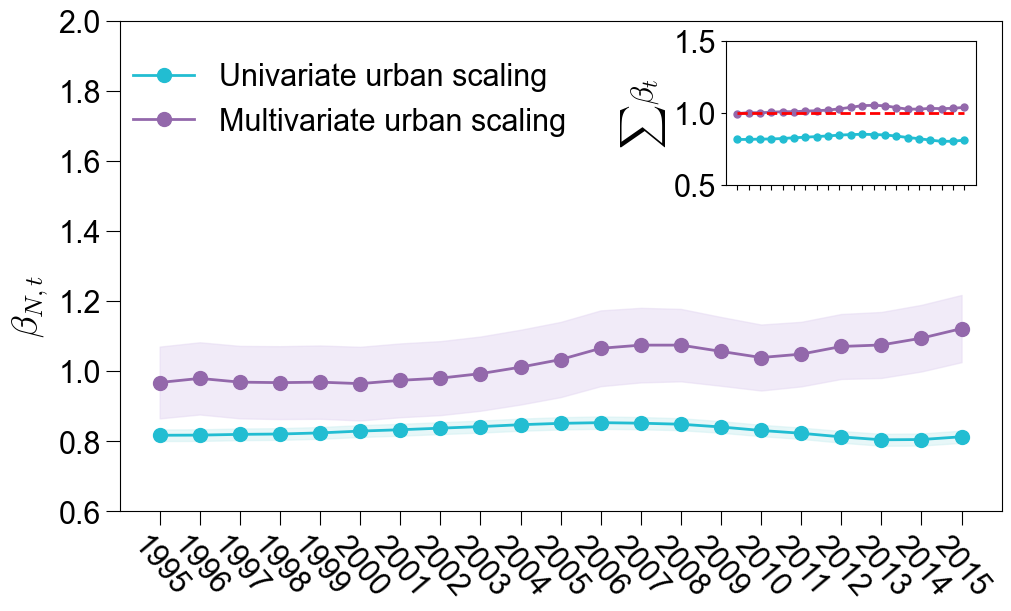

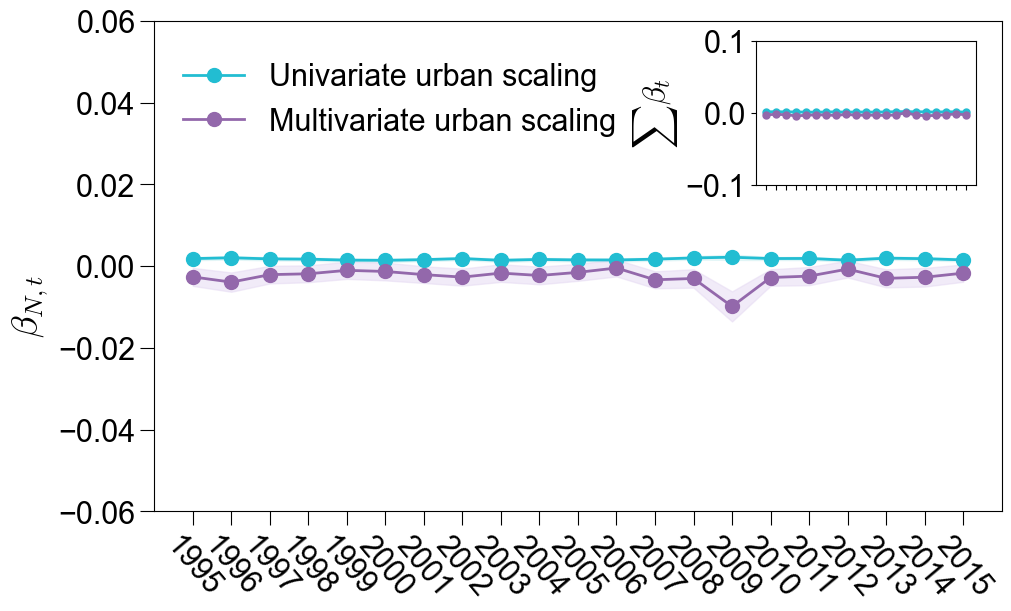

In [6]:
index = ['Total Population', ]
print(index)

static_variables = np.ones((M, len(index)), dtype=float)
for i in range(len(index)):
    # static_variables[:,i] = dataset[dataset['date']=='2019-01-05'][index[i]].tolist()
    static_variables[:,i] = dataset[(dataset['year']==2010)][index[i]].tolist()

SAMIs_CO2 = np.zeros((M, T), dtype=float)
SAMIs_CO2_static = np.zeros((len(index), T), dtype=float)
SAMIs_CO2_CI_low = np.zeros((len(index), T), dtype=float)
SAMIs_CO2_CI_high = np.zeros((len(index), T), dtype=float)
SAMIs_TEMP = np.zeros((M, T), dtype=float)
SAMIs_TEMP_static = np.zeros((len(index), T), dtype=float)
SAMIs_TEMP_CI_low = np.zeros((len(index), T), dtype=float)
SAMIs_TEMP_CI_high = np.zeros((len(index), T), dtype=float)
for t in range(T):
    y = dataset.year.unique()[t]
    print(y)
    df = dataset[(dataset['year']==y)]
    SAMIs_CO2[:,t], SAMIs_CO2_static[:,t], SAMIs_CO2_CI_low[:,t], SAMIs_CO2_CI_high[:, t] = get_FAMIs(static_variables,df['kgco2'])
    
    SAMIs_TEMP[:,t], SAMIs_TEMP_static[:,t], SAMIs_TEMP_CI_low[:,t], SAMIs_TEMP_CI_high[:, t] = get_FAMIs(static_variables,df['tavg_adj'])

colors = ['#22BDD2',  '#9368AB',]
shadows = ['#D0F0F2', '#E4D8F2',]
indices = ['Univariate urban scaling','Multivariate urban scaling']

plt.rcParams.update({
    'font.size' : 22,
    "lines.linewidth": 2,
    "lines.markersize":10,
    "font.family":"arial",
    #"font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "mathtext.default": "it",
    "mathtext.rm"  : "arial",
        })
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6), sharex=True, constrained_layout=True)
axes.tick_params(axis="x",direction="out", size=10)
axes.tick_params(axis="y",direction="out", size=10)

for i in range(len(index)):
    # print(df_mix_msa.columns[-7:][i])
    axes.plot(range(T),SAMIs_CO2_static[i,:],'o-',label=indices[i],color=colors[i])
    axes.fill_between(range(T), SAMIs_CO2_CI_low[i,:], SAMIs_CO2_CI_high[i,:],color=shadows[i],alpha=.5)
    axes.plot(range(T),FAMIs_CO2_static[i,:],'o-',label=indices[1],color=colors[1])
    axes.fill_between(range(T), FAMIs_CO2_CI_low[i,:], FAMIs_CO2_CI_high[i,:],color=shadows[1],alpha=.5)

l, b, h, w = .72, .7, .24, .25
ax2 = fig.add_axes([l, b, w, h])
for i in range(len(index)):
    ax2.plot(range(T),SAMIs_CO2_static[i,:],'.-',color=colors[0])
    ax2.plot(range(T),np.sum(FAMIs_CO2_static, axis=0),'.-',color=colors[1])
ax2.hlines(y=1,xmin=0,xmax=T-1,linestyles='--',colors='r')
ax2.set_xticks(range(0,T,1),'')
ax2.set_ylim(0.5, 1.5)
ax2.set_ylabel(r'$\sum\beta_t$')
axes.set_xticks(range(0,T,1),[dataset.year.unique()[t] for t in range(0,T,1)],rotation=-50,size=22)
axes.set_ylim([0.6, 2])
fig.supylabel(r'$\beta_{N,t}$')
fig.legend( loc = 'upper left', bbox_to_anchor = (0.1, -0.05, 1, 1), frameon=False)
# plt.savefig('ScalingExponent_CO2.pdf',dpi=300)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 6),  sharex=True, constrained_layout=True)
axes.tick_params(axis="x",direction="out", size=10)
axes.tick_params(axis="y",direction="out", size=10)
for i in range(len(index)):
    axes.plot(range(T),SAMIs_TEMP_static[i,:],'o-',label=indices[i],color=colors[i])
    axes.fill_between(range(T), SAMIs_TEMP_CI_low[i,:], SAMIs_TEMP_CI_high[i,:],color=shadows[i],alpha=.5)
    axes.plot(range(T),FAMIs_TEMP_static[i,:],'o-',label=indices[1],color=colors[1])
    axes.fill_between(range(T), FAMIs_TEMP_CI_low[i,:], FAMIs_TEMP_CI_high[i,:],color=shadows[1],alpha=.5)
axes.set_xticks(range(0,T,1),[dataset.year.unique()[t] for t in range(0,T,1)],rotation=-50, size=22)
l, b, h, w = .75, .7, .24, .22
ax2 = fig.add_axes([l, b, w, h])
for i in range(len(index)):
    ax2.plot(range(T),SAMIs_TEMP_static[i,:],'.-',color=colors[0])
    ax2.plot(range(T),np.sum(FAMIs_TEMP_static, axis=0),'.-',color=colors[1])
ax2.hlines(y=1,xmin=0,xmax=T-1,linestyles='--',colors='r')
ax2.set_xticks(range(0,T,1),'')
ax2.set_ylim(-.1, .1)
ax2.set_ylabel(r'$\sum\beta_t$')
axes.set_xticks(range(0,T,1),[dataset.year.unique()[t] for t in range(0,T,1)],rotation=-50,size=22)
axes.set_ylim([-0.06, .06])
fig.supylabel(r'$\beta_{N,t}$')
fig.legend( loc = 'upper left', bbox_to_anchor = (0.15, -0.05, 1, 1), frameon=False)
# plt.savefig('ScalingExponent_TEMP.pdf',dpi=300)
plt.show()



# Statistical test: i.i.d.

In [18]:

from scipy import stats
import pandas as pd

# Assuming covid_fami is your DataFrame
results = []  # To store results

# Iterate over all pairs of rows in the dataset
def preprocessing(array):
    covid_fami = adf_detrend(np.array(array))
    covid_fami_ = covid_fami.flatten()
    percentile = [np.percentile(covid_fami_, 50)]
    covid_fami_ = symbolize(covid_fami_, percentile)
    covid_fami = covid_fami_.reshape(covid_fami.shape)
    return covid_fami

co2_fami = preprocessing(FAMIs_CO2)
temp_fami = preprocessing(FAMIs_TEMP)



for i in range(co2_fami.shape[0]):
    for j in range(i + 1, co2_fami.shape[0]):  # Avoid comparing a row with itself
        ks_result_co2= stats.kstest(co2_fami[i], co2_fami[j])
        ks_result_temp = stats.kstest(temp_fami[i], temp_fami[j])
        
        # Store results as a tuple (row1 index, row2 index, statistic, pvalue)
        results.append((i, j, ks_result_co2.statistic, ks_result_co2.pvalue,
                        ks_result_temp.statistic, ks_result_temp.pvalue,))

# Convert results into a DataFrame for easier interpretation
results_df = pd.DataFrame(results, columns=['Row1', 'Row2', 'CO2_Statistic', 'CO2_P-value',
                                            'TEMP_Statistic', 'TEMP_P-value'])

results_df

,Row1,Row2,CO2_Statistic,CO2_P-value,TEMP_Statistic,TEMP_P-value
0,0,1,0.047619,1.000000,0.47619,0.015905
1,0,2,0.047619,1.000000,0.52381,0.005467
2,0,3,0.000000,1.000000,0.00000,1.000000
3,0,4,0.000000,1.000000,0.00000,1.000000
4,0,5,0.047619,1.000000,0.52381,0.005467
...,...,...,...,...,...,...
4713980,3067,3069,0.047619,1.000000,0.00000,1.000000
4713981,3067,3070,0.047619,1.000000,0.00000,1.000000
4713982,3068,3069,0.047619,1.000000,0.52381,0.005467
4713983,3068,3070,0.142857,0.987044,0.52381,0.005467


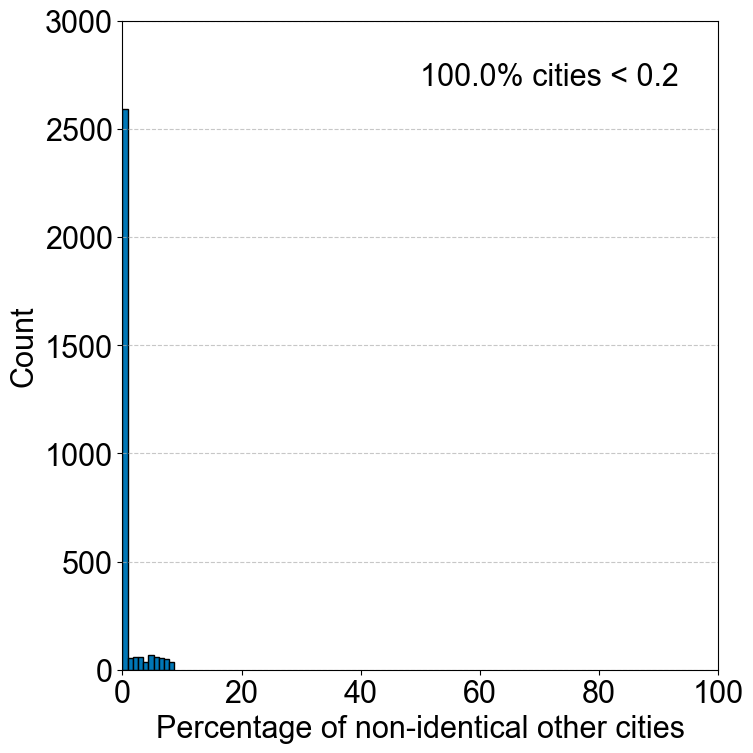

In [25]:
unique_row1 = results_df['Row1'].unique()
ratios = [
    results_df[(results_df['Row1'] == r) & (results_df['CO2_P-value'] < 0.05/(co2_fami.shape[0]-1))].shape[0] * 100 / len(unique_row1)
    for r in unique_row1
]
ratios_frac = [
    results_df[(results_df['Row1'] == r) & (results_df['CO2_P-value'] < 0.05/(co2_fami.shape[0]-1))].shape[0] / len(unique_row1)
    for r in unique_row1
]

# Calculate histogram manually
counts, bin_edges = np.histogram(ratios, bins=2)
probabilities = counts / counts.sum()  # Normalize to probabilities

# Plot the histogram
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8,8))
plt.hist(ratios, bins=10, edgecolor='black', color='#0077b6', density=False)
# plt.bar(bin_centers, probabilities, width=np.diff(bin_edges), edgecolor='black', color='#0077b6')
plt.xlabel('Percentage of non-identical other cities')
plt.ylabel('Count')
# plt.title('Probability Distribution of Ratios of $p$-values < 0.05')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,3000)
plt.xlim(0,100)
plt.text(0.5, 0.9, r'{}% cities < 0.2'.format(np.round(sum(r<=0.20 for r in ratios_frac)*100/len(ratios_frac), 2),), transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig('Prob_ratio_CO2.pdf', dpi=300)
plt.show()



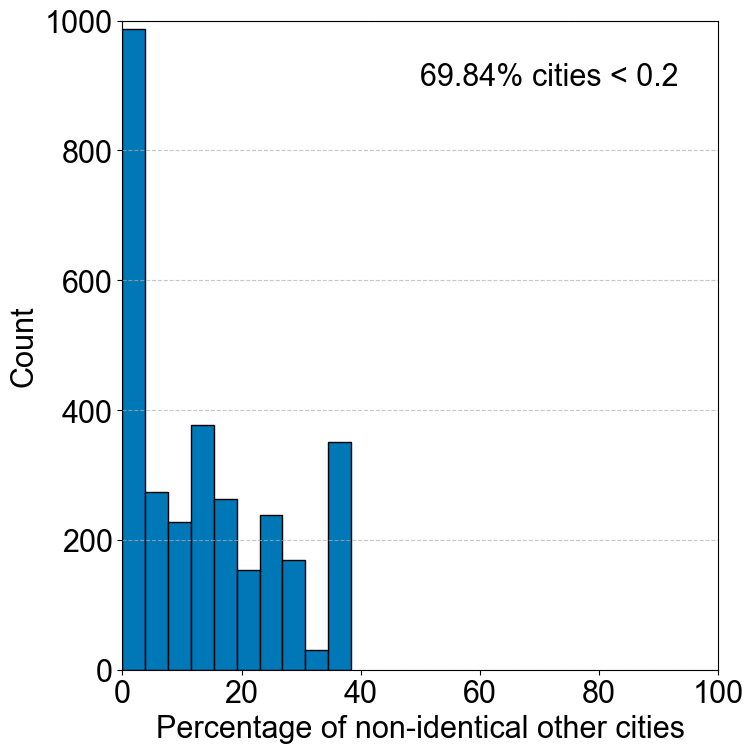

In [26]:

unique_row1 = results_df['Row1'].unique()
ratios = [
    results_df[(results_df['Row1'] == r) & (results_df['TEMP_P-value'] < 0.05/(co2_fami.shape[0]-1))].shape[0] * 100 / len(unique_row1)
    for r in unique_row1
]
ratios_frac = [
    results_df[(results_df['Row1'] == r) & (results_df['TEMP_P-value'] < 0.05/(co2_fami.shape[0]-1))].shape[0] / len(unique_row1)
    for r in unique_row1
]

# Calculate histogram manually
counts, bin_edges = np.histogram(ratios, bins=10)
probabilities = counts / counts.sum()  # Normalize to probabilities

# Plot the histogram
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8,8))
plt.hist(ratios, bins=10, edgecolor='black', color='#0077b6', density=False)
# plt.bar(bin_centers, probabilities, width=np.diff(bin_edges), edgecolor='black', color='#0077b6')
plt.xlabel('Percentage of non-identical other cities')
plt.ylabel('Count')
# plt.title('Probability Distribution of Ratios of $p$-values < 0.05')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,1000)
plt.xlim(0,100)
plt.text(0.5, 0.9, r'{}% cities < 0.2'.format(np.round(sum(r<=0.20 for r in ratios_frac)*100/len(ratios_frac), 2),), transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig('Prob_ratio_TEMP.pdf', dpi=300)
plt.show()


In [ ]:

# from libpysal.weights import Queen
from esda.moran import Moran
from libpysal.weights import DistanceBand

import geopandas as gpd
import numpy as np
from builtins import all


county_shape = gpd.read_file("./Data/tl_2010_us_county10/tl_2010_us_county10.shp")
county_shape['countyfips'] = [int(i) for i in county_shape['GEOID10']]
# cbsa_shape['cbsacode']
county_shape

# Generate weights with a threshold of 10 units
def spatial_autocorrelation(array):
    # print(array.shape)
    MORAN = []
    MORAN_PVAL = []
    df = pd.DataFrame({
            'countyfips': yearly_carbon_data.countyfips.unique(),
        })
    dt_famis = adf_detrend(array)
    for t in range(array.shape[1]):
        df['famis_{}'.format(str(t))] = dt_famis[:, t]

    county_carbon_famis = gpd.GeoDataFrame(county_shape.merge(df, on='countyfips'))
    for t in range(array.shape[1]):

        # Create a contiguity weights matrix
        w = DistanceBand.from_dataframe(county_carbon_famis, threshold=20)
        w.transform = 'r'  # Row standardization

        # Specify the variable of interest
        variable = county_carbon_famis["famis_{}".format(str(t))]

        # Calculate Moran's I
        moran = Moran(variable, w)
        # print(f"Moran's I: {moran.I}")
        MORAN.append(moran.I)
        # print(f"P-value: {moran.p_sim}")
        MORAN_PVAL.append(moran.p_sim)
    return MORAN, MORAN_PVAL

def find_independence(MORAN):
    return len([m for m in MORAN if m<-0.1 or m>0.1])

# Determine spatial independence
CO2_MORAN, CO2_MORAN_PVAL = spatial_autocorrelation(FAMIs_CO2)
TEMP_MORAN, TEMP_MORAN_PVAL = spatial_autocorrelation(FAMIs_TEMP)


In [12]:
print(f"Number of Moran's I for COVID-19 new infections (-0.1 < I < 0.1): {find_independence(CO2_MORAN)} out of {len(CO2_MORAN)}")
print(f"Number of Moran's I for COVID-19 new deaths (-0.1 < I < 0.1): {find_independence(TEMP_MORAN)} out of {len(TEMP_MORAN)}")

Number of Moran's I for COVID-19 new infections (-0.1 < I < 0.1): 0 out of 21
Number of Moran's I for COVID-19 new deaths (-0.1 < I < 0.1): 0 out of 21
